
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a><br/> Fall. 2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 4 - Machine Learning with ScikitLearn </a></center>

<br/>

# ``4. Going Further``

---

<a href="#style"><b>Package check and Styling</b></a><br/><br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#furtherNew"> Creating new features/models</a><br/>&nbsp;&nbsp;&nbsp; b) <a href="#furtherVal"> Validation and Hyperparameters tuning</a><br/>&nbsp;&nbsp;&nbsp; c) <a href="#learVal"> Text and Image Features</a><br/>&nbsp;&nbsp;&nbsp; d) <a href="#furExo"> Exercises  </a><br/>

## <a id="furtherNew"> a) Creating new features/models</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We saw above how to transform categorical features. It is possible to modify them in a number of ways in order to create different model.


For instance, from 1D  point/value couples $(x,y)$, the linear regression fits a line. However, if we tranform $x$ into $(x^1,x^2,x^3)$, the same linear regression will fit a 3-degree polynomial.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


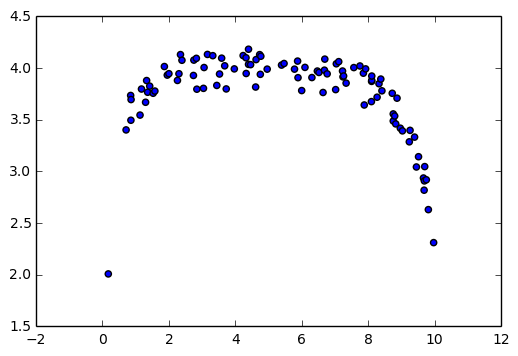

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set() 

N = 100  #points to generate

X = np.sort(10*np.random.rand(N, 1)**0.8 , axis=0)  #abscisses

y = 4 + 0.4*np.random.rand(N) - 1. / (X.ravel() + 0.5)**2  - 1. / (10.5 - X.ravel() ) # some complicated function

plt.scatter(X,y)

Linear regression will obviously be a bad fit.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


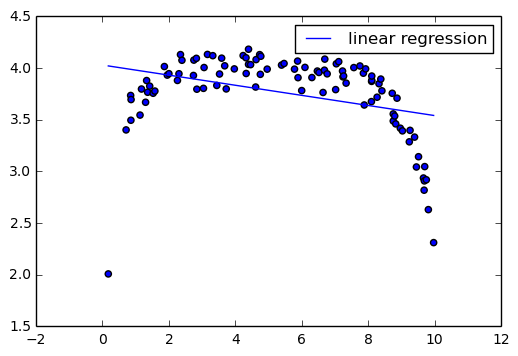

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(X, y)
plt.plot(X, yfit,label="linear regression")
plt.legend()

Let us transform it into a 3-degree polynomial fit and perform the same linear regression.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) # 3 degree without degree 0 (no constant)
XPoly = poly.fit_transform(X)
print(XPoly[:5,])

[[ 0.17714296  0.03137963  0.00555868]
 [ 0.71270793  0.50795259  0.36202184]
 [ 0.85017419  0.72279615  0.61450263]
 [ 0.85765091  0.73556509  0.63085807]
 [ 0.8626183   0.74411034  0.64188319]]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


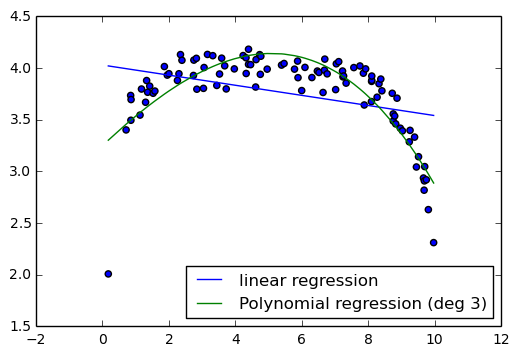

In [4]:
modelPoly = LinearRegression().fit(XPoly, y)
yfitPoly = modelPoly.predict(XPoly)
plt.scatter(X, y)
plt.plot(X, yfit,label="linear regression")
plt.plot(X, yfitPoly,label="Polynomial regression (deg 3)")
plt.legend(loc = 'lower right')

### Pipeline 

This *2-step* fitting (Polynomial transform + Linear regression) calls for a replicated dataset which can be costly. That is why Scikit Learn implement a *pipeline* method that allows to perform multiple fit/transform sequentially.

This pipeline can then be used as a model. 



/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


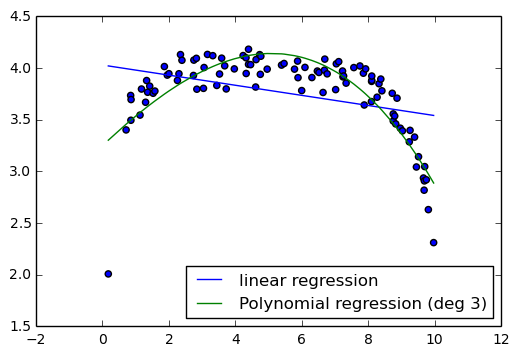

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polyFeat = PolynomialFeatures(degree=3, include_bias=False)
linReg = LinearRegression()

polyReg = Pipeline([ ('polyFeat',polyFeat) , ('linReg',linReg) ])

polyReg.fit(X, y) # X original not XPoly
yfitPolyNew = polyReg.predict(X)

plt.scatter(X, y)
plt.plot(X, yfit,label="linear regression")
plt.plot(X, yfitPolyNew,label="Polynomial regression (deg 3)")
plt.legend(loc = 'lower right')

## <a id="furtherVal"> b) Validation and Hyperparameters tuning</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We saw above (see the lasso example of the regression part) some basic examples of how to:
* *validate our model* by splitting the dataset into training and testing set (using <tt>train_test_split</tt> from <tt>sklearn.model_selection</tt>)
* *tune hyperparameter* by looking at the error for different values

Scikit Learn actually provides some methods for that as well.

### Validation

Scikit Learn offer a *cross validation* method that 
* split the dataset in several groups
* for each of these group, fit the model on all but this group and computer the error on this one

This way all the data has gone thought the learning and validating sets hence the *cross* validation. This is illustrated by the following figure from the  [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.

![Cross validation](img/cv.png)

The score computer is computed either as the standard score of the estimator or can be precised with the <tt>scoring</tt> option (see the [available metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) ). 

<div id="warn"> <b>Warning:</b> All scorer objects follow the convention that higher return values are better than lower return values. </div>


Let us compute the cross validation for our polynomial fit problem. 

In [6]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(polyReg, X, y, cv=5, scoring="neg_mean_absolute_error") # 5 groups cross validation

print(cv_score)
print("Mean score:" , np.mean(cv_score))

[-0.83184925 -0.12044359 -0.22175632 -0.22954883 -0.92647202]
Mean score: -0.466014001082


### Grid Search

Now that scoring and cross validation is done, we can focus on investigating the best parameters of our polynomial model:
* degree
* presence or not of an intercept

Let us see which are the parameters of our model (as this is a pipeline, this might be interesting to use the <tt>get_params</tt> function).

In [7]:
polyReg.get_params()

{'linReg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linReg__copy_X': True,
 'linReg__fit_intercept': True,
 'linReg__n_jobs': 1,
 'linReg__normalize': False,
 'polyFeat': PolynomialFeatures(degree=3, include_bias=False, interaction_only=False),
 'polyFeat__degree': 3,
 'polyFeat__include_bias': False,
 'polyFeat__interaction_only': False,
 'steps': [('polyFeat',
   PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)),
  ('linReg',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

This enables to see the parameters corresponding to the quantities to fit:
* degree: <tt>polyFeat__degree</tt>
* presence or not of an intercept: <tt>linReg\__fit_intercept</tt>  and <tt>polyFeat__include_bias</tt>

We can now construct a *dictionary* of values to test.

In [8]:
param_grid = [
  {'polyFeat__degree':  np.arange(1,12),
   'linReg__fit_intercept': [True,False],
   'polyFeat__include_bias': [True,False]}]

In [9]:
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(polyReg, param_grid, cv=5) 
grid.fit(X, y)

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('polyFeat', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('linReg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'polyFeat__include_bias': [True, False], 'linReg__fit_intercept': [True, False], 'polyFeat__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

We can then get the best parameters and the corresponding model.

In [10]:
grid.best_params_

{'linReg__fit_intercept': True,
 'polyFeat__degree': 4,
 'polyFeat__include_bias': True}

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


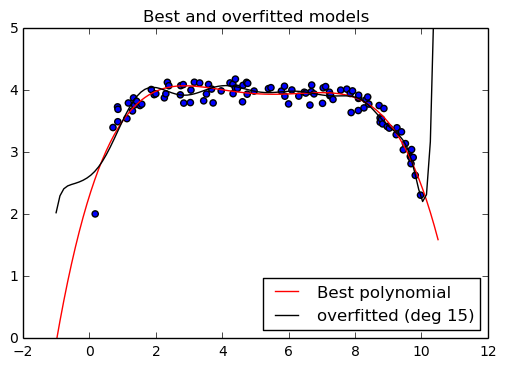

In [11]:
best_model = grid.best_estimator_.fit(X,y)
overfit = polyReg.set_params(polyFeat__degree=15).fit(X,y)

Xplot = np.linspace(-1,10.5,100).reshape(-1, 1)
yBest = best_model.predict(Xplot)
yOver = overfit.predict(Xplot)

plt.scatter(X, y)
plt.plot(Xplot, yBest , 'r' ,label="Best polynomial")
plt.plot(Xplot, yOver , 'k' , label="overfitted (deg 15)")
plt.legend(loc = 'lower right')
plt.ylim([0,5])
plt.title("Best and overfitted models")

We notice that the grid search based on cross validation helped discarded overfitted models (as they were bad on validation sets).

## <a id="learVal"> c) Text and Image Features</a>  


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


We already saw an example of feature extraction from categorical data. However, for some particular categorical data, dedicated tools exist. For instance, text and images.


### Text feature extraction


In Learning applications, words are usually more important than letters, so a basic way to extract features is to construct one feature per present word and count the occurences of this word. This is known as *word count*. An approach to mitigate very present words (like "the" , "a" , etc) is *term frequency inverse document frequency* (tf-idf) which weights the occurence count by how often it appears. 


In [12]:
f = open('./data/poems/poe-raven.txt', 'r')
poe = f.read().replace('\n',' ').replace('.','').replace(',','').replace('-','')
poe

'                                      1845                                    THE RAVEN                                by Edgar Allan Poe      Once upon a midnight dreary while I pondered weak and weary   Over many a quaint and curious volume of forgotten lore     While I nodded nearly napping suddenly there came a tapping    As of some one gently rapping rapping at my chamber door   "\'Tis some visitor" I muttered "tapping at my chamber door                 Only this and nothing more"      Ah distinctly I remember it was in the bleak December   And each separate dying ember wrought its ghost upon the floor     Eagerly I wished the morrow; vainly I had sought to borrow     From my books surcease of sorrow sorrow for the lost Lenore   For the rare and radiant maiden whom the angels name Lenore                 Nameless here for evermore      And the silken sad uncertain rustling of each purple curtain   Thrilled me filled me with fantastic terrors never felt before;     So that now to s

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform([poe])
X

/usr/lib/python3/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:


<1x438 sparse matrix of type '<class 'numpy.int64'>'
	with 438 stored elements in Compressed Sparse Row format>

The vectorizer has registered the feature names and outed a sparse matrix that can be converted to a Dataframe.

In [14]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


,1845,above,adore,again,agreeing,ah,aidenn,air,all,allan,...,within,wondering,word,wore,wretch,wrought,yet,yore,you,your
0,1,7,1,1,1,2,1,1,4,1,...,2,1,6,1,1,1,2,3,3,1


The tf-idf verctorizer works the same way.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform([poe])
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/lib/python3/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:
/usr/lib/python3/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


,1845,above,adore,again,agreeing,ah,aidenn,air,all,allan,...,within,wondering,word,wore,wretch,wrought,yet,yore,you,your
0,0.01003,0.070211,0.01003,0.01003,0.01003,0.02006,0.01003,0.01003,0.040121,0.01003,...,0.02006,0.01003,0.060181,0.01003,0.01003,0.01003,0.02006,0.03009,0.03009,0.01003


For more details, see the [text feature extraction doc](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) and [image feature extraction doc](http://scikit-learn.org/stable/modules/feature_extraction.html#image-feature-extraction) as well as [scikit image](http://scikit-image.org/).

## <a id="furExo"> c) Exercises  </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


<div class="exo"> <b>Exercise 4.4.1:</b> <i>Differentiating authors according to their word usage</i><br/>

In the folder <tt>data/poems</tt> are three poems by Edgar Alan Poe and three plays by William Shakespeare. Is it possible to differentiate these authors using only the word in their plays?
</div>

---
<div id="style"></div>
### Package Check and Styling


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


In [ ]:
import lib.notebook_setting as nbs

packageList = ['IPython', 'numpy', 'scipy', 'matplotlib', 'cvxopt', 'pandas', 'seaborn', 'sklearn', 'tensorflow']
nbs.packageCheck(packageList)

nbs.cssStyling()